___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

* In this lecture we will see how to use SciKit-Learn to implement K Means Clustering Algorithm. We will also see how to create artificial data with SKLearn's capabilities.

## Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* **NOTE** : As unsupervised means, we are not trying to predict some sort of outcome but we are trying to find patterns in the data. In K means clustering we have to specify the number of clusters we want the data to be grouped in.

* Now we will see how to use SKLearn to generate some artificial data. Real data to be used in portfolio project.

## Create some data

In [3]:
from sklearn.datasets import make_blobs
# make_blobs generate blob like data where we can add cluster std. deviation too, features we need, centers etc.

In [4]:
# Create artificial data that we will be using.
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)
#Keep random state same to have similar blobs

* Data is a tuple and first element in that tuple gives us numpy array.
* Numpy array data[0] is simply number of samples and 2 columns of features.
* It's shape is 200,2 for precisely that reason.

In [7]:
# data
# data[0]
data[0].shape
# And this random data will have 4 blobs in it.

(200, 2)

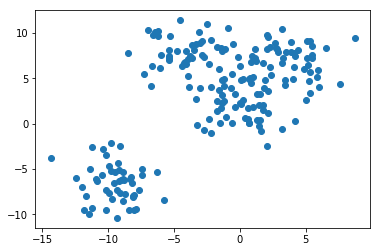

In [8]:
# Plotting the blobs to get a better idea.

# Grabbing all the rows and first column which we plot against all the rows and second column.
plt.scatter(data[0][:,0],data[0][:,1])

- Above we can see there are 2 blobs for sure.

In [9]:
# Looking at second item we get a list to which cluster a blob belongs to which can be seen as below :
data[1]
# We can plot the above scatter plot using data[1] in a hue kind of manner to have distinguished clusters.

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

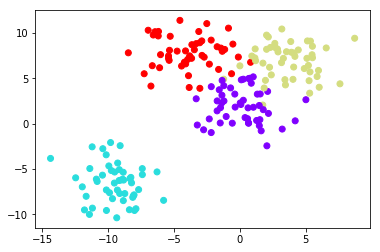

In [11]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap="rainbow")
# This is how we can use SkLearn to create artificial data for clustering. 
# make_blobs is a really nice tool you can use to play around with some of the ML models when we do not want to deal with
# a real dataset, we can just make our own artificial data and add cluster_std for us to distinguish blobs manually.

- We can see 1 blob is really separate compared to other 3, where we see some amount of noise.
- Now we see how to use SkLearn to create a K Means Clustering algorithm

## Creating the Clusters

In [12]:
from sklearn.cluster import KMeans

- As K Means is unsupervised so it will start assigning each observation to some cluster and find centroid of each cluster.
- Then algorithm iterates through 2 following steps :
    - Reassign data points to the cluster whose centroid is closest
    - Calculate the new centroid for each cluster and keeps repeating it until cluster variation can't be reduced anymore.

In [13]:
kmeans = KMeans(n_clusters=4) 
# NOTE: We have to know number of expected clusters beforehand in KMeans Clustering Algo.

In [14]:
kmeans.fit(data[0]) # Fit to the features.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
kmeans.cluster_centers_ # Returns array of actual centers of the clusters.

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [18]:
kmeans.labels_ 
# Returns the labels our algorithm believes to be true for the given clusters.

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

- NOTE : If we are working with real data and we did not have real labels then this is the final stage. We wouldn't be able to compare anything to real values. Since here we do know the correct labels present inside data[1] we compare these with kmeans.labels_ we got above for accuracy of prediction.

- In general we wouldn't use kmeans cluster to predict labels rather use it to find labels since here we have real labels for data we created as well as predicted label in kmeans.labels_ so we give it a try for knowing the accuracy.

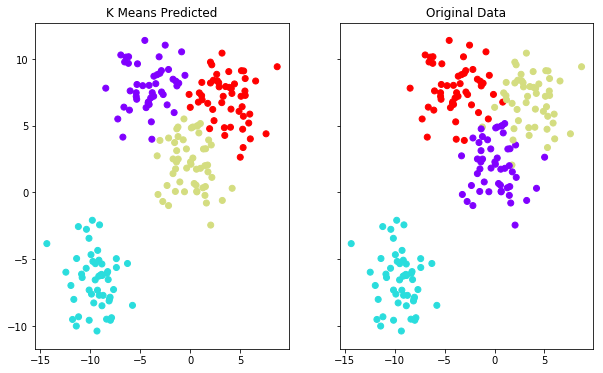

In [19]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means Predicted')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow') # Color as per label

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow') # Color as per data[1]

- We are creating a subplot of 1 row, 2 columns and the plots having the same axes and using tuple unpacking to grab these
- 2 sets of axes, these first set of axes ax1 will be plotting original data and colour the data based on what algorithm thought labels should look like.
- Another plot ax2 will plot the original data and color it as per the factually correct blobs.
- Also remember that even if 2 plots have different clusters, that is not our goal here, as we can see that even with different colours approximately the clusters represented are almost same in shape.

## Clusters with different k values

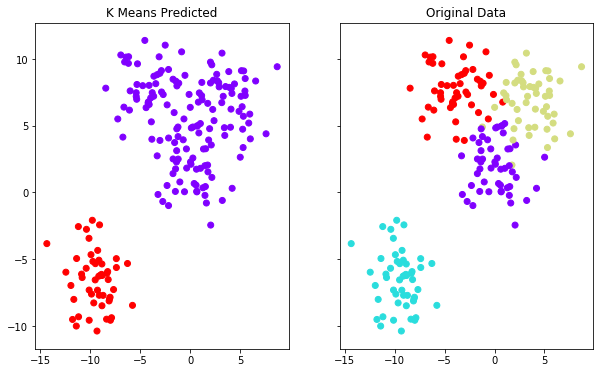

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[0])
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means Predicted')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow') # Color as per label

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow') # Color as per data[1]

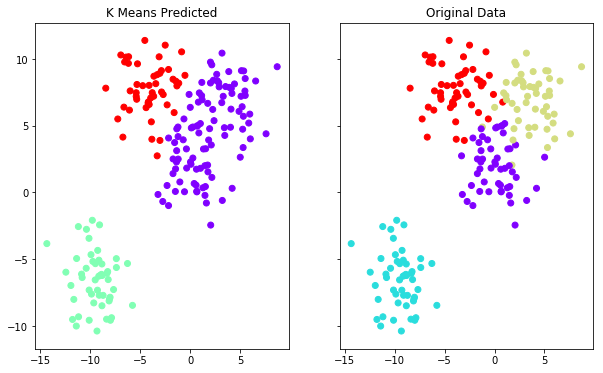

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[0])
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

ax1.set_title('K Means Predicted')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow') # Color as per label

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow') # Color as per data[1]

**NOTE** : The colors are meaningless in reference between the two plots.